# Mask R-CNN 

Detect four objects: Baseball, Baseketball, Football, and Soccerball.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir Mask
!mkdir datasets

In [3]:
%cd Mask/
!pwd

/content/Mask
/content/Mask


In [0]:
!git clone https://github.com/SYunMoon/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 968 (delta 0), reused 3 (delta 0), pack-reused 962
Receiving objects: 100% (968/968), 111.86 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (571/571), done.


In [7]:
%cd Mask_RCNN
!pip install -r requirements.txt

/content/Mask/Mask_RCNN
     |████████████████████████████████| 411.5MB 43kB/s 
     |████████████████████████████████| 3.8MB 35.3MB/s 
     |████████████████████████████████| 512kB 46.4MB/s 
     |████████████████████████████████| 204kB 44.3MB/s 
     |████████████████████████████████| 163kB 44.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=bdee2ddf5ba81f8f23516cdd55a19ce82f5f25014c864a52a531151bef147df6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0

In [8]:
!pwd
!cp /content/gdrive/My\ Drive/Mask_RCNN/mask_rcnn_coco.h5 /content/Mask/Mask_RCNN/

/content/Mask/Mask_RCNN


In [9]:
#%cd Mask_RCNN
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/baseball.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/v

In [9]:
!pip install git+https://github.com/philferriere/cocoapi.git


  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-req-build-ob_6apth
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-req-build-ob_6apth
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275381 sha256=5279571228b00bbec37d32682da0b7375a76b4735e57ad19ccc12e8cb4b472e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-7iaokrwn/wheels/69/2b/12/2fa959e49f73d26cff202c2f4e5079096c9c57c8a8509fd75c
Successfully built pycocotools


In [0]:
!cp -r /content/gdrive/My\ Drive/sports_ball/ /content/datasets/

In [0]:
############################################################
#  Training Configurations
############################################################
from mrcnn.config import Config

class Sports_ballConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "sports_ball"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [0]:
############################################################
#  Dataset
############################################################

from mrcnn import model as modellib, utils

class Sports_ballDataset(utils.Dataset):

    def load_sports_ball(self, dataset_dir, subset):
        """Load a subset of the Balloon dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("sports_ball", 1, "Baseball")
        self.add_class("sports_ball", 2, "Basketball")
        self.add_class("sports_ball", 3, "Football")
        self.add_class("sports_ball", 4, "Soccer_ball")

        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # We mostly care about the x and y coordinates of each region
        # Note: In VIA 2.0, regions was changed from a dict to a list.
        annotations = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
        annotations = list(annotations.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]

        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. These are stores in the
            # shape_attributes (see json format above)
            # The if condition is needed to support VIA versions 1.x and 2.x.
            polygons = [r['shape_attributes'] for r in a['regions']]
            objects = [s['region_attributes'] for s in a['regions']]
            class_ids=[]
            for n in objects:
                try:
                    if n['sports_ball'] == 'Baseball':
                        class_ids.append(1)
                    elif n['sports_ball'] == 'Basketball':
                        class_ids.append(2)
                    elif n['sports_ball'] == 'Football':
                        class_ids.append(3)
                    elif n['sports_ball'] == 'Soccer_ball':
                        class_ids.append(4)
                    elif n['sports_ball'] == 'Tennis_ball':
                        class_ids.append(5)
                except:
                    pass
                
	    # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            # print("multi_numbers=", multi_numbers)
            # num_ids = [n for n in multi_numbers['number'].values()]
            # for n in multi_numbers:
            
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            (height, width) = image.shape[:2]

            self.add_image(
                "sports_ball",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
		            class_ids=class_ids)
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a balloon dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "sports_ball":
            return super(self.__class__, self).load_mask(image_id)
        class_ids = image_info['class_ids']
        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        #class_ids=np.array([self.class_names.index(shapes[0])])

        #print("info['class_ids']=", info['class_ids'])
        class_ids = np.array(class_ids, dtype=np.int32)
        return mask,class_ids
        
    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "sports_ball":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [0]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = Sports_ballDataset()
    dataset_train.load_sports_ball(SPORTS_BALL_DIR, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = Sports_ballDataset()
    dataset_val.load_sports_ball(SPORTS_BALL_DIR, "val")
    dataset_val.prepare()

    # *** This training schedule is an example. Update to your needs ***
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')

In [0]:
def color_splash(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    # Copy color pixels from the original color image where mask is set
    if mask.shape[-1] > 0:
        # We're treating all instances as one, so collapse the mask into one layer
        mask = (np.sum(mask, -1, keepdims=True) >= 1)
        splash = np.where(mask, image, gray).astype(np.uint8)
    else:
        splash = gray.astype(np.uint8)
    return splash

In [0]:
def detect_and_color_splash(model, image_path=None, video_path=None):
    assert image_path or video_path

    # Image or video?
    if image_path:
        # Run model detection and generate the color splash effect
        print("Running on {}".format(args.image))
        # Read image
        image = skimage.io.imread(args.image)
        # Detect objects
        r = model.detect([image], verbose=1)[0]
        # Color splash
        splash = color_splash(image, r['masks'])
        # Save output
        file_name = "splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, splash)
    elif video_path:
        import cv2
        # Video capture
        vcapture = cv2.VideoCapture(video_path)
        width = int(vcapture.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(vcapture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = vcapture.get(cv2.CAP_PROP_FPS)

        # Define codec and create video writer
        file_name = "splash_{:%Y%m%dT%H%M%S}.avi".format(datetime.datetime.now())
        vwriter = cv2.VideoWriter(file_name,
                                  cv2.VideoWriter_fourcc(*'MJPG'),
                                  fps, (width, height))

        count = 0
        success = True
        while success:
            print("frame: ", count)
            # Read next image
            success, image = vcapture.read()
            if success:
                # OpenCV returns images as BGR, convert to RGB
                image = image[..., ::-1]
                # Detect objects
                r = model.detect([image], verbose=0)[0]
                # Color splash
                splash = color_splash(image, r['masks'])
                # RGB -> BGR to save image to video
                splash = splash[..., ::-1]
                # Add image to video writer
                vwriter.write(splash)
                count += 1
        vwriter.release()
    print("Saved to ", file_name)

In [0]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log


In [0]:
SPORTS_BALL_DIR = os.path.join("/content/datasets/sports_ball")

In [21]:
import skimage.draw

# Load dataset
 
dataset = Sports_ballDataset()
dataset.load_sports_ball(SPORTS_BALL_DIR,"train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 17
Class Count: 5
  0. BG                                                
  1. Baseball                                          
  2. Basketball                                        
  3. Football                                          
  4. Soccer_ball                                       


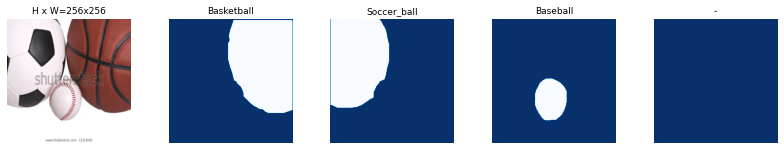

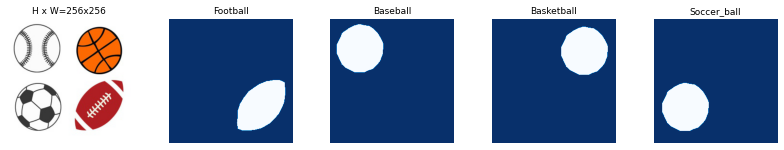

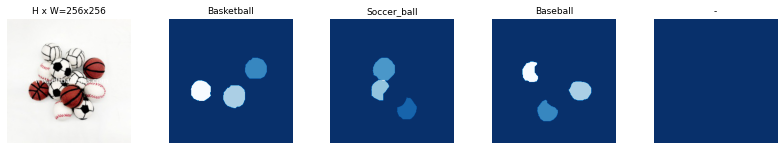

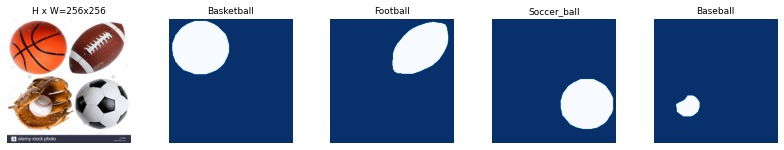

In [22]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    #print (class_ids,dataset.class_names)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [0]:
############################################################
#  Training config
############################################################

config = Sports_ballConfig()

In [24]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir='./')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


In [0]:
# Select weights file to load

weights_path = 'mask_rcnn_coco.h5'
#weights_path = 'cfg/mask_rcnn_baseball_0010.h5'

    # Load weights
#    print("Loading weights ", weights_path)
    # number of classes
model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

In [0]:
def train(model):
    """Train the model."""
    # Training dataset.
    dataset_train = Sports_ballDataset()
    dataset_train.load_sports_ball(SPORTS_BALL_DIR, "train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = Sports_ballDataset()
    dataset_val.load_sports_ball(SPORTS_BALL_DIR, "val")
                            
    dataset_val.prepare()

    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=20,
                layers='heads')

In [136]:
train(model)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: ./sports_ball20200423T1857/mask_rcnn_sports_ball_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mr

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multi

Epoch 1/20
100/100 [==============================] - 155s 2s/step - loss: 0.7674 - val_loss: 0.4673
Epoch 2/20
100/100 [==============================] - 142s 1s/step - loss: 0.0779 - val_loss: 0.3009
Epoch 3/20
100/100 [==============================] - 142s 1s/step - loss: 0.0757 - val_loss: 0.4656
Epoch 4/20
100/100 [==============================] - 142s 1s/step - loss: 0.0803 - val_loss: 0.6417
Epoch 5/20
100/100 [==============================] - 142s 1s/step - loss: 0.0629 - val_loss: 0.6543
Epoch 6/20
100/100 [==============================] - 142s 1s/step - loss: 0.0528 - val_loss: 0.2271
Epoch 7/20
100/100 [==============================] - 142s 1s/step - loss: 0.0466 - val_loss: 0.3975
Epoch 8/20
100/100 [==============================] - 142s 1s/step - loss: 0.0429 - val_loss: 0.2629
Epoch 9/20
100/100 [==============================] - 142s 1s/step - loss: 0.0544 - val_loss: 0.1938
Epoch 10/20
100/100 [==============================] - 142s 1s/step - loss: 0.0465 - val_lo

In [0]:
############################################################
#  Evaluate the Mask R-CNN model.
#  Inference config
############################################################
class InferenceConfig(Sports_ballConfig):

#            # Set batch size to 1 since we'll be running inference on
#            # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
 GPU_COUNT = 1
 IMAGES_PER_GPU = 1

In [0]:
config = InferenceConfig()

In [0]:
import tensorflow as tf

DEVICE = "/cpu:0"
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir='./',
                              config=config)

In [0]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [32]:
from mrcnn import visualize
from mrcnn.visualize import display_images

weights_path = 'mask_rcnn_sports_ball_0070.h5'

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)


Loading weights  mask_rcnn_coco.h5


Processing 1 images
image                    shape: (3899, 2877, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 3899.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32





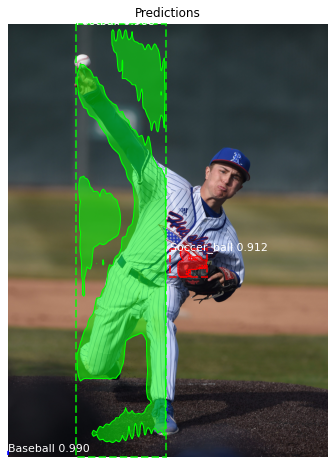

In [33]:
import random
from mrcnn.model import log

filename = ('../../datasets/ball4.jpg')
image = skimage.io.imread(filename)
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")